<a href="https://colab.research.google.com/github/Uttumon/Data_Visualization/blob/main/DV_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Description:
                     Month  Passengers         Year   Month_Num
count                  144  144.000000   144.000000  144.000000
mean   1954-12-16 05:00:00  280.298611  1954.500000    6.500000
min    1949-01-01 00:00:00  104.000000  1949.000000    1.000000
25%    1951-12-24 06:00:00  180.000000  1951.750000    3.750000
50%    1954-12-16 12:00:00  265.500000  1954.500000    6.500000
75%    1957-12-08 18:00:00  360.500000  1957.250000    9.250000
max    1960-12-01 00:00:00  622.000000  1960.000000   12.000000
std                    NaN  119.966317     3.464102    3.464102


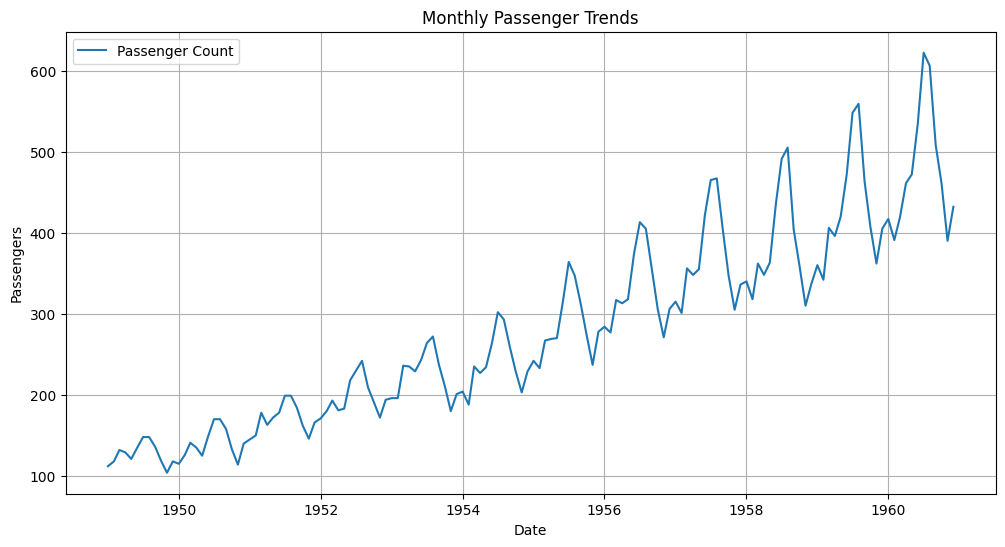

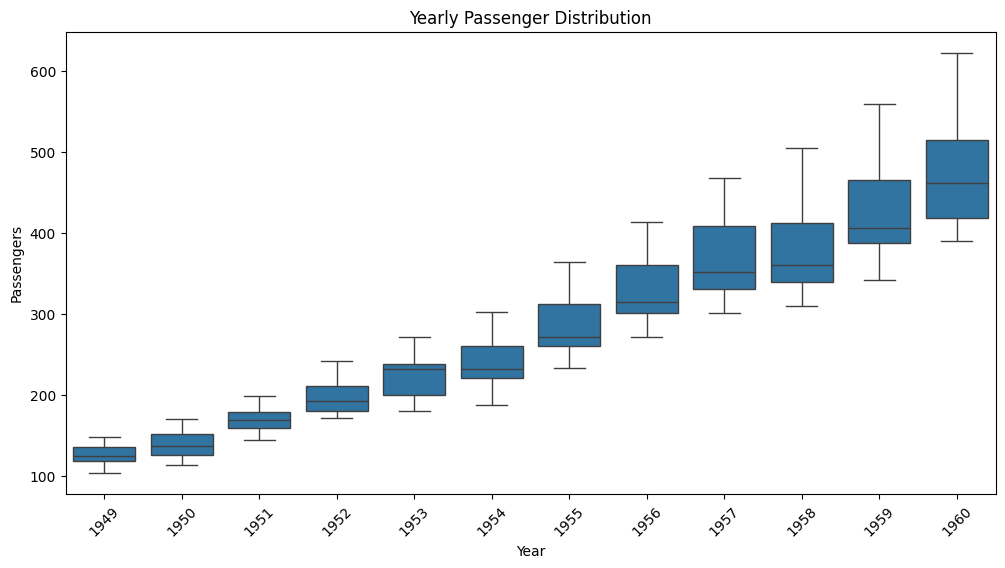

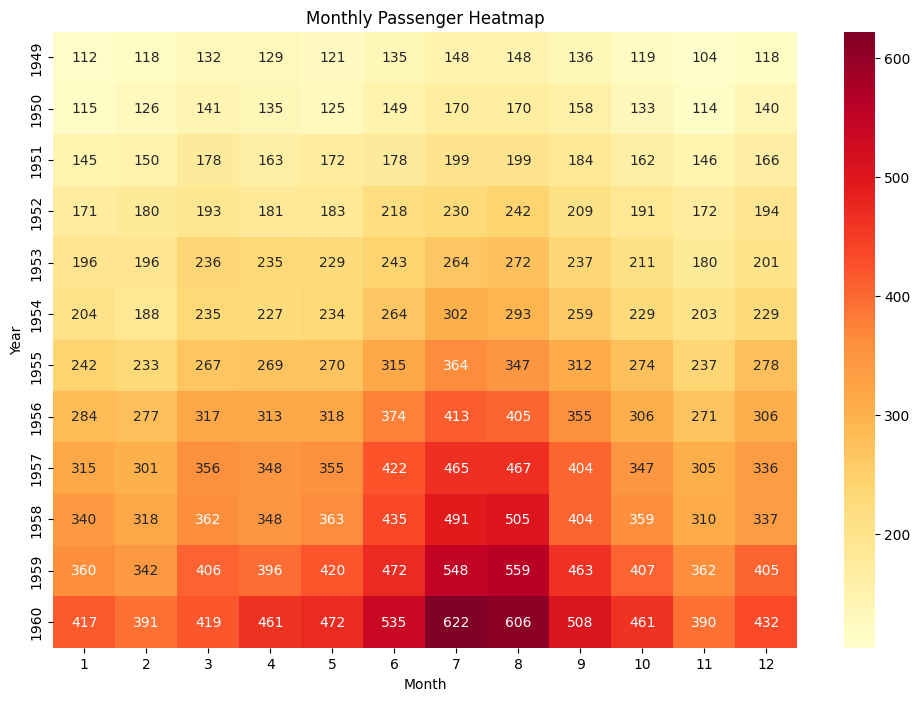

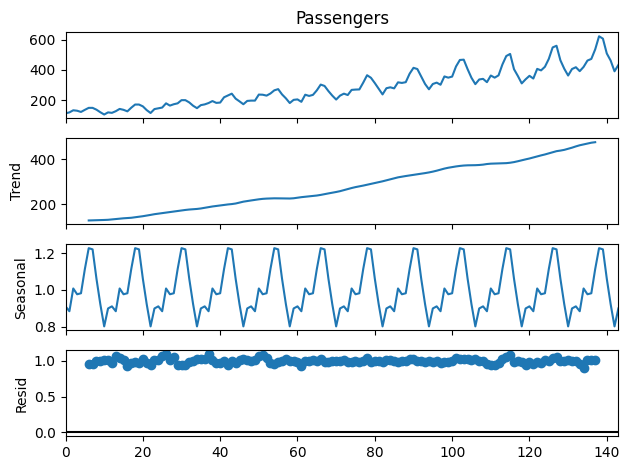

Root Mean Squared Error (RMSE): 39.594633343775534


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


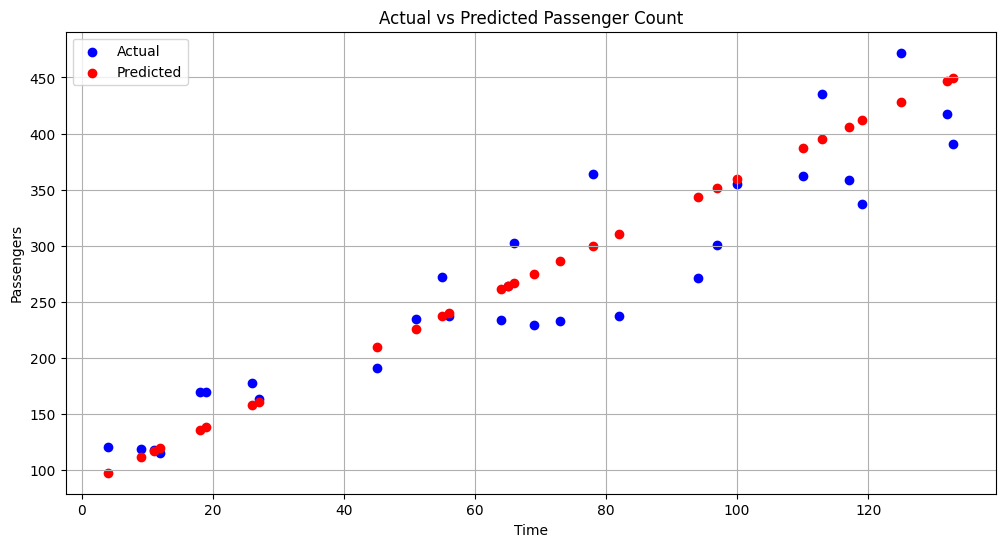

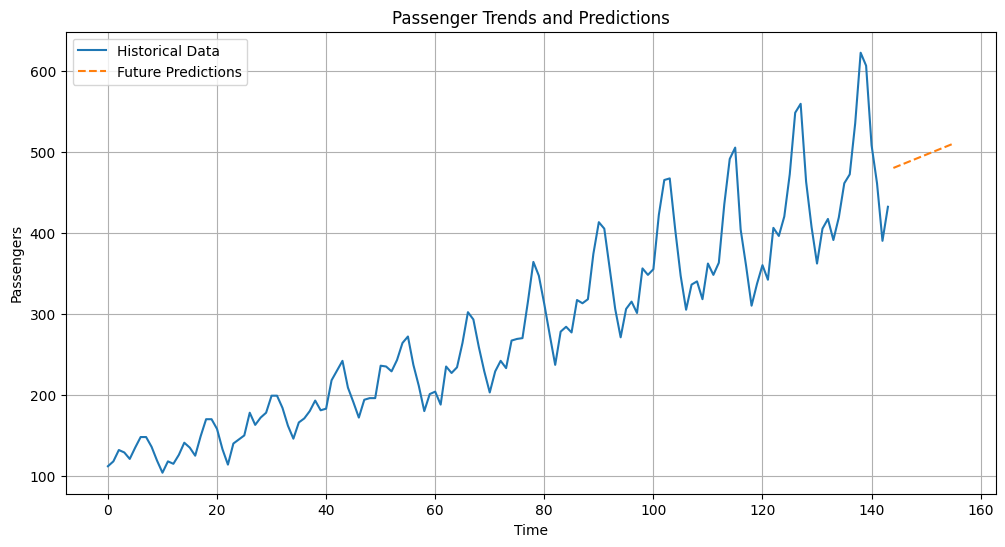

Learning Outcomes:
- Acquired and preprocessed data for analysis.
- Analyzed data patterns using descriptive statistics and various visualizations.
- Explored seasonal decomposition of the time series data.
- Trained and tested a Linear Regression model.
- Evaluated model performance using RMSE.
- Made and visualized predictions for future trends.
- Compared actual vs predicted values to assess model accuracy.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Step 1: Acquire Data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)
# Step 2: Data Cleaning and Preprocessing
data = data.dropna()
data['Month'] = pd.to_datetime(data['Month'])
data['Year'] = data['Month'].dt.year
data['Month_Num'] = data['Month'].dt.month
data['Passengers'] = data['Passengers'].astype(float)
# Step 3: Analyze Data Patterns
print("Data Description:")
print(data.describe())
## Visualization 1: Monthly Passenger Trends
plt.figure(figsize=(12, 6))
plt.plot(data['Month'], data['Passengers'], label="Passenger Count")
plt.title("Monthly Passenger Trends")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.show()
## Visualization 2: Yearly Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Passengers', data=data)
plt.title("Yearly Passenger Distribution")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.xticks(rotation=45)
plt.show()
## Visualization 3: Monthly Heatmap
pivot_data = data.pivot(index='Year', columns='Month_Num', values='Passengers')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='YlOrRd', annot=True, fmt='g')
plt.title("Monthly Passenger Heatmap")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()
## Visualization 4: Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)
result.plot()
plt.tight_layout()
plt.show()
# Step 4: Feature Selection
data['Time'] = np.arange(len(data))
X = data[['Time']]
y = data['Passengers']
# Step 5: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 6: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)
# Step 7: Test the Model
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Step 8: Predict Future Trends
future_time = np.arange(len(data), len(data) + 12).reshape(-1, 1)
future_predictions = model.predict(future_time)
## Visualization 5: Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')
plt.title("Actual vs Predicted Passenger Count")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.show()
## Visualization 6: Prediction Results and Future Trends
plt.figure(figsize=(12, 6))
plt.plot(data['Time'], data['Passengers'], label="Historical Data")
plt.plot(future_time, future_predictions, label="Future Predictions", linestyle='--')
plt.title("Passenger Trends and Predictions")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.show()
# Learning Outcomes
print("Learning Outcomes:")
print("- Acquired and preprocessed data for analysis.")
print("- Analyzed data patterns using descriptive statistics and various visualizations.")
print("- Explored seasonal decomposition of the time series data.")
print("- Trained and tested a Linear Regression model.")
print("- Evaluated model performance using RMSE.")
print("- Made and visualized predictions for future trends.")
print("- Compared actual vs predicted values to assess model accuracy.")
